## 연습문제 : 지하철 승하차 인원 비교 (Q5.1)

- 서울시 지하철 승하차 인원을 2개의 월별승하차인원에 대하여 비교해보자. 
- 코로나 바이러스 이전의 2018년03월, 2020년03월, 2023년3월을 비교하여 그래프로 그려보자.

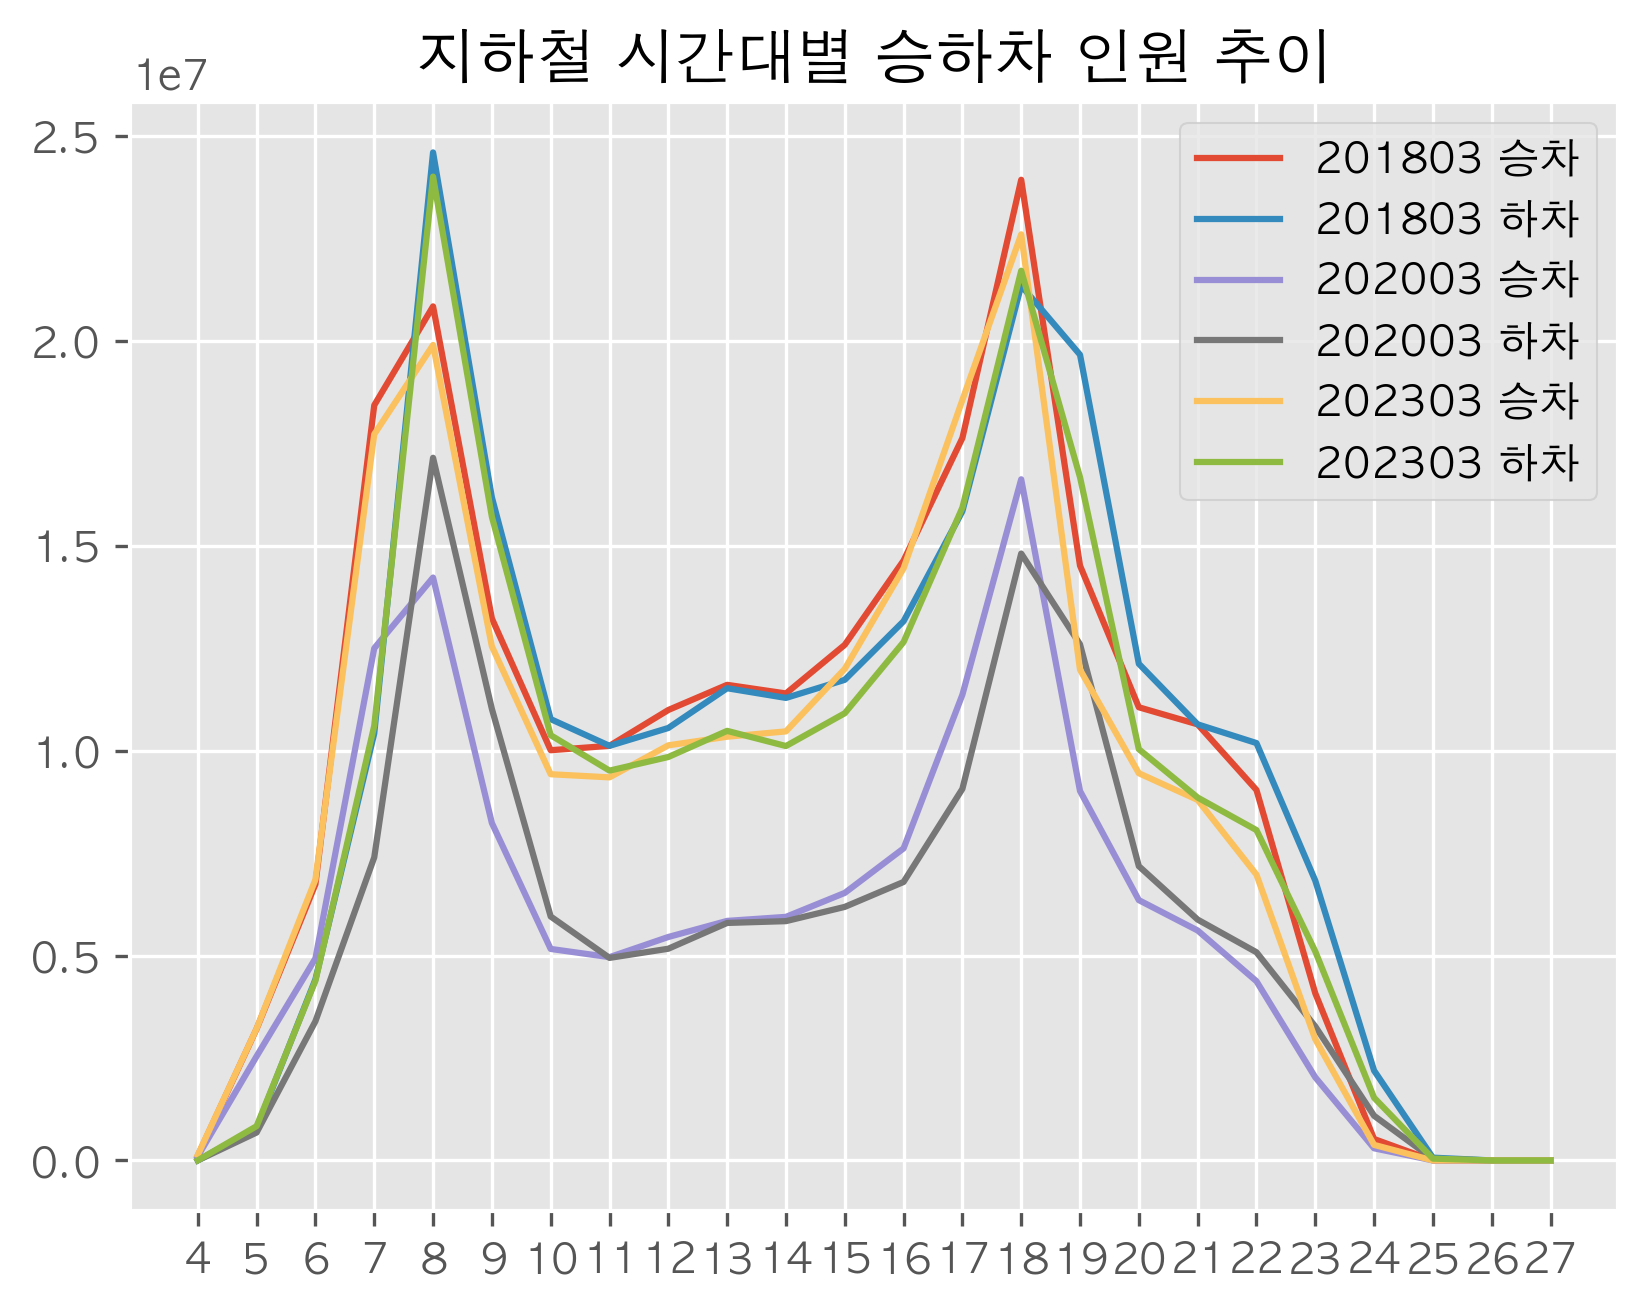

In [27]:
subway2018_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/hw/hw5_2018_03_subwaytime.csv'
subway2020_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/hw/hw5_2020_03_subwaytime.csv'
subway2023_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/hw/hw5_2023_03_subwaytime.csv'

# 쉼표 지우는 함수
def removeComma(data):
    result = []
    
    for row in data :
        for i in range(4, 52):
            row[i] = int(row[i].replace(',', ''))
        result.append(row)
    return result

# 2018 데이터 읽기
import csv
f2018 = open(subway2018_path)
data2018 = csv.reader(f2018)
next(data2018)
next(data2018)
data2018 = removeComma(data2018) # 쉼표 제거하기
f2018.close()

# 2020 데이터 읽기
import csv
f2020 = open(subway2020_path)
data2020 = csv.reader(f2020)
next(data2020)
next(data2020)
data2020 = removeComma(data2020) # 쉼표 제거하기
f2020.close()

# 2023 데이터 읽기
import csv
f2023 = open(subway2023_path)
data2023 = csv.reader(f2023)
next(data2023)
next(data2023)
data2023 = removeComma(data2023) # 쉼표 제거하기
f2023.close()

# 시간대별 승차 인원 추이
def getSubwayIn(data):
    result = [0] * 24
    
    for row in data:
        row[4:-1] = map(int, row[4:-1]) 
        for i in range(24) :
            result[i] += row[4 + i * 2]
    return result

# 시간대별 하차 인원 추이
def getSubwayOut(data):
    result = [0] * 24
    
    for row in data:
        row[4:-1] = map(int, row[4:-1]) 
        for i in range(24) :
            result[i] += row[5 + i * 2] 
    return result


# 지하철 시간대별 승하차 인원 추이
import csv

s_in_2018 = getSubwayIn(data2018)
s_out_2018 = getSubwayOut(data2018)
s_in_2020 = getSubwayIn(data2020)
s_out_2020 = getSubwayOut(data2020)
s_in_2023 = getSubwayIn(data2023)
s_out_2023 = getSubwayOut(data2023)
        
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in_2018, label = '201803 승차')
plt.plot(s_out_2018, label = '201803 하차')
plt.plot(s_in_2020, label = '202003 승차')
plt.plot(s_out_2020, label = '202003 하차')
plt.plot(s_in_2023, label = '202303 승차')
plt.plot(s_out_2023, label = '202303 하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()

--------

## 연습문제 : 인구구조 비슷한 지역 찾기 (Q5.2)
- “강남구 대치1동”의 인구구조와 가장 비슷한 곳은 어디인지 5곳을 찾아 그래프로 나타내어 보아라.

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 강남구 대치1동


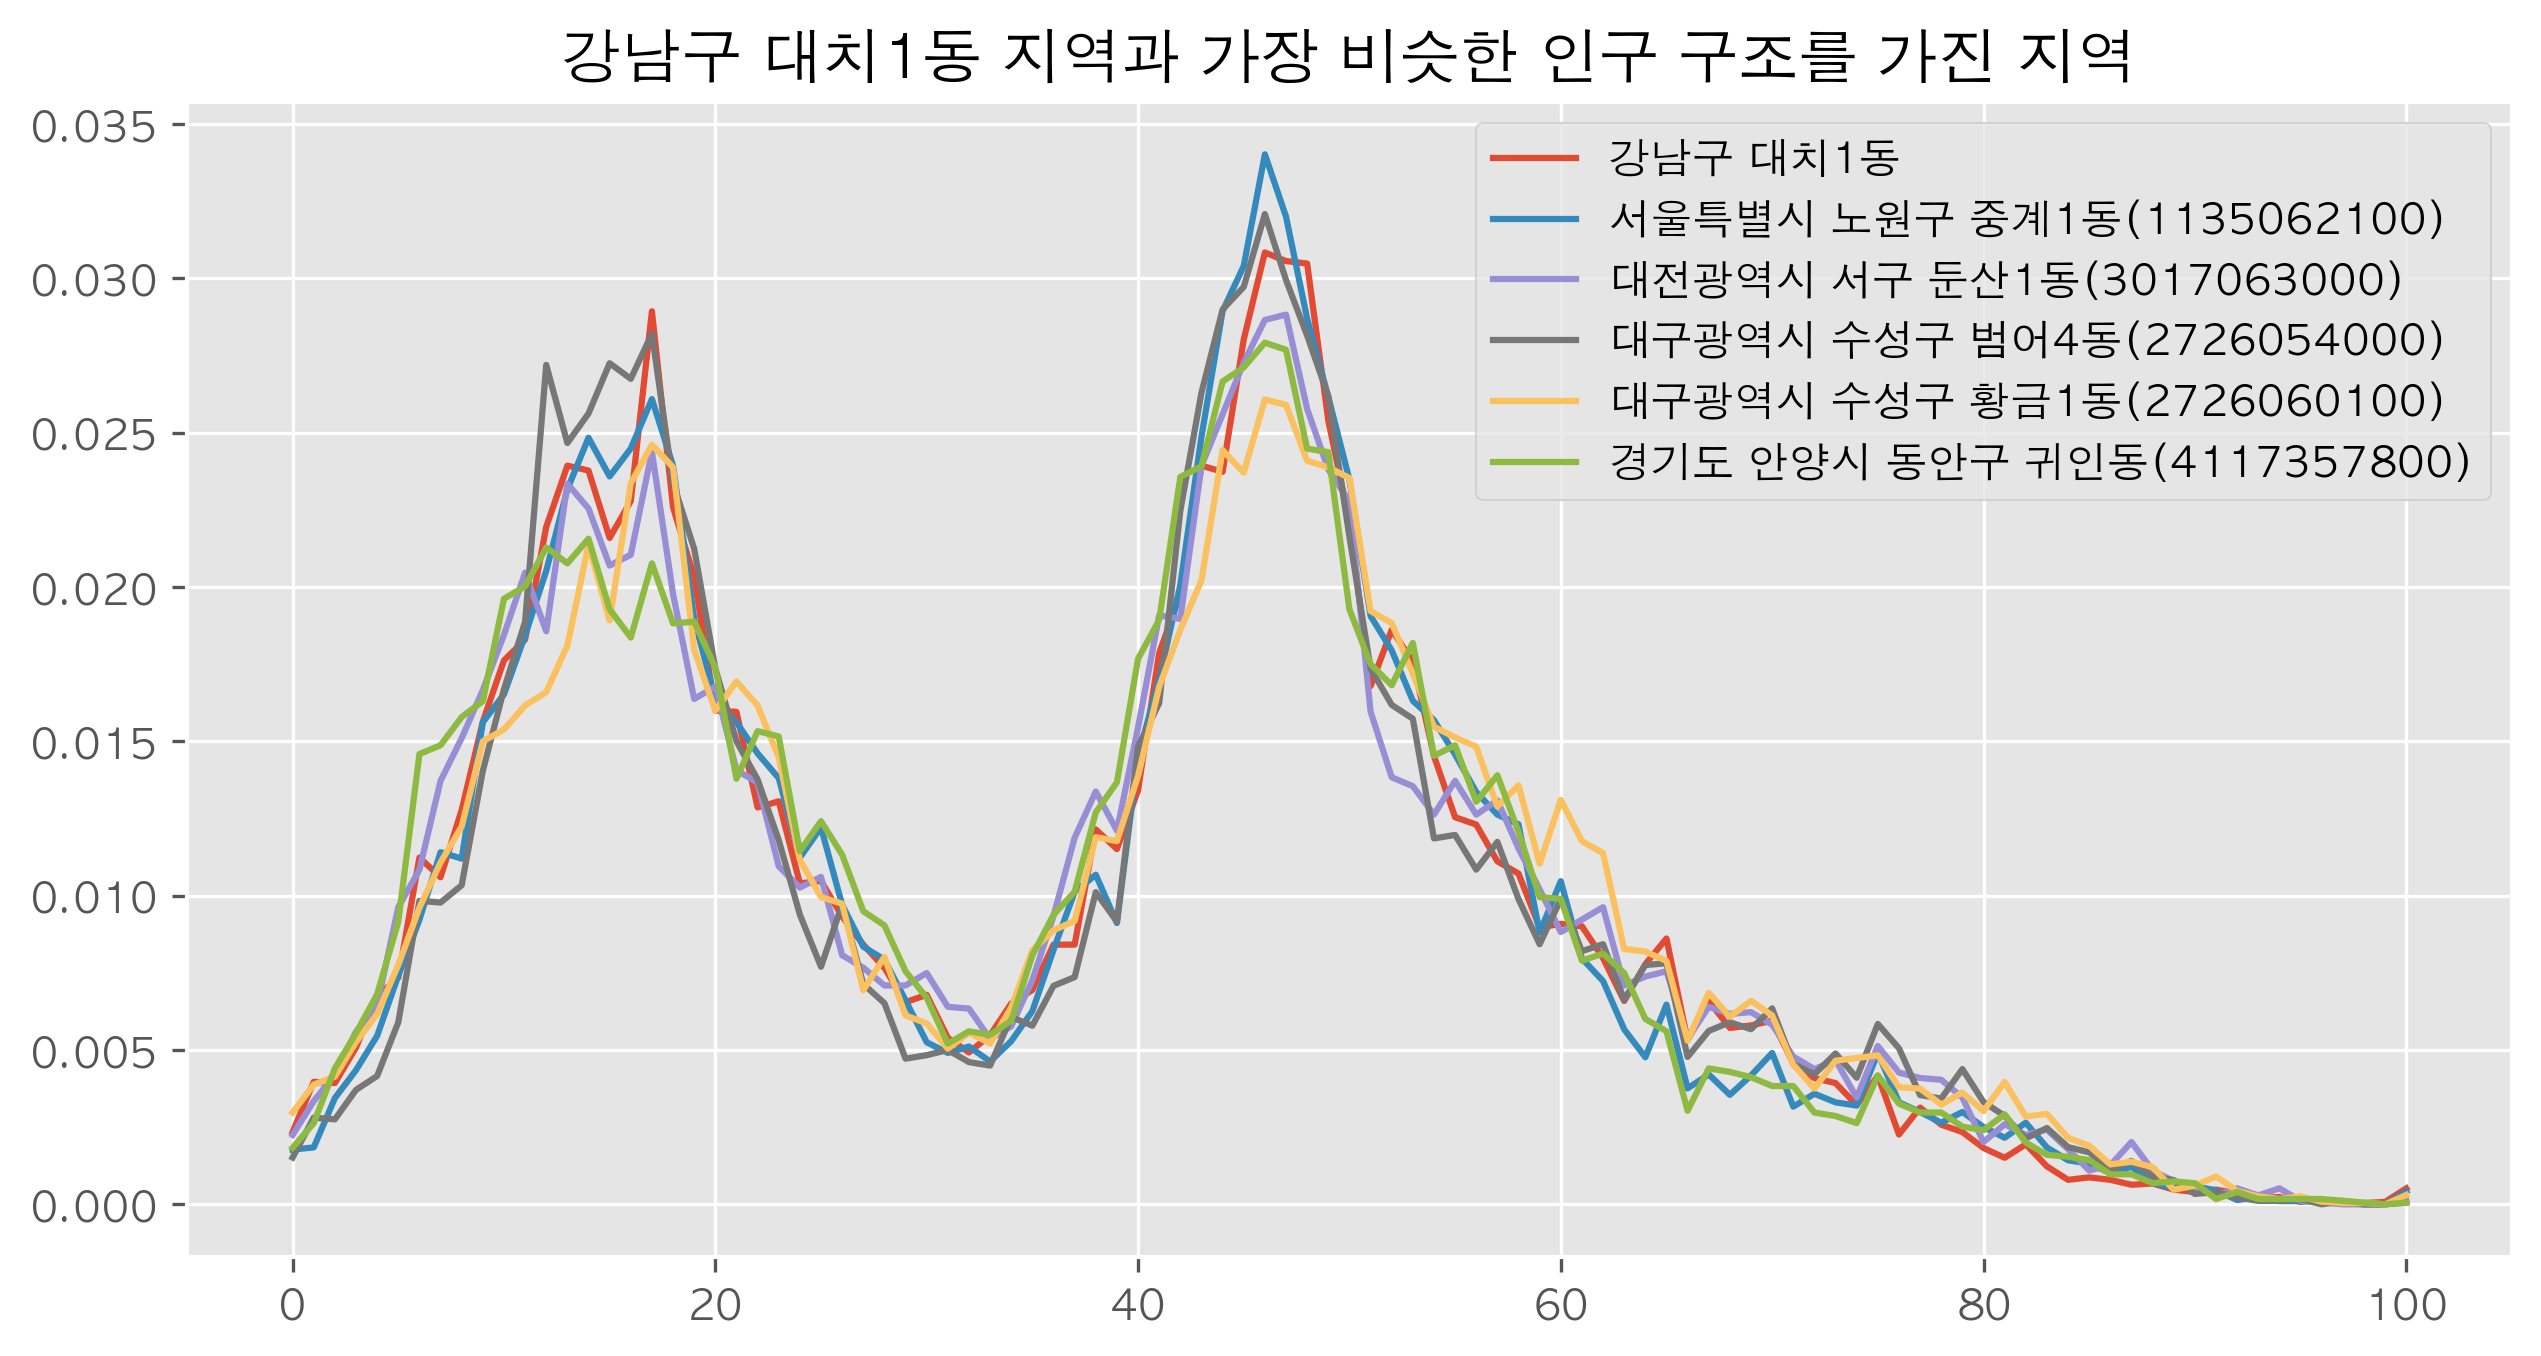

In [28]:
import csv

age_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week05/age.csv'

# 1. 데이터 읽기
f = open(age_path, 'r', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

# 2. 궁금한 지역의 이름을 입력
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
mn = 1           # 최솟값
result_name = '' # 최솟값 지역명
result = 0       # 최솟값 지역의 연령대별 인구 비율
home = []        # 입력 받은 지역 데이터

# 3. 궁금한 지역의 인구 구조 저장
for row in data :
    # 입력 받은 지역의 이름이 포함된 행 찾기
    if name in row[0]:
        areaname = row[0]
        for i in row[3:]:       # 3번 인덱스 값부터 슬라이싱 0세~
            home.append(int(i)) # 입력 받은 지역의 데이터를 home에 저장
        hometotal = int(row[2])
# 인구 비율 계산        
for k in range(len(home)):
    home[k]=(home[k]/hometotal)
    
#4. 위와 가장 비슷한 인구 구조를 가진 지역 찾기
result_list=[]

for row in data : 
    away = []
    for i in row[3:]:       # 3번 인덱스 값부터 슬라이싱 0세~
        away.append(int(i)) # 입력 받은 지역의 데이터를 away에 저장
    awaytotal = int(row[2])
    
    for k in range(len(away)):
        away[k]=(away[k]/awaytotal)
        
    # sum이 0에 가까우면 인구 비율이 home에 가까움
    s = 0
    for j in range(len(away)):
        s = s + (home[j]-away[j])**2
    result_list.append([row[0], away, s])
result_list.sort(key=lambda s: s[2]) # sum 값으로 정렬

f.close()

# 5. home과 가장 비슷한 곳의 인구 구조를 시각화
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)            
plt.rcParams['font.family'] = 'AppleGothic'
plt.title(name +' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result_list[1][1], label = result_list[1][0])
plt.plot(result_list[2][1], label = result_list[2][0])
plt.plot(result_list[3][1], label = result_list[3][0])
plt.plot(result_list[4][1], label = result_list[4][0])
plt.plot(result_list[5][1], label = result_list[5][0])
plt.legend()
plt.show()

---------

## 연습문제 : 인구구조 비슷한 지역 찾기 (Q5.3)
- Q5.2 문제를 pandas 로 읽어서 처리해본다

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 강남구 대치1동


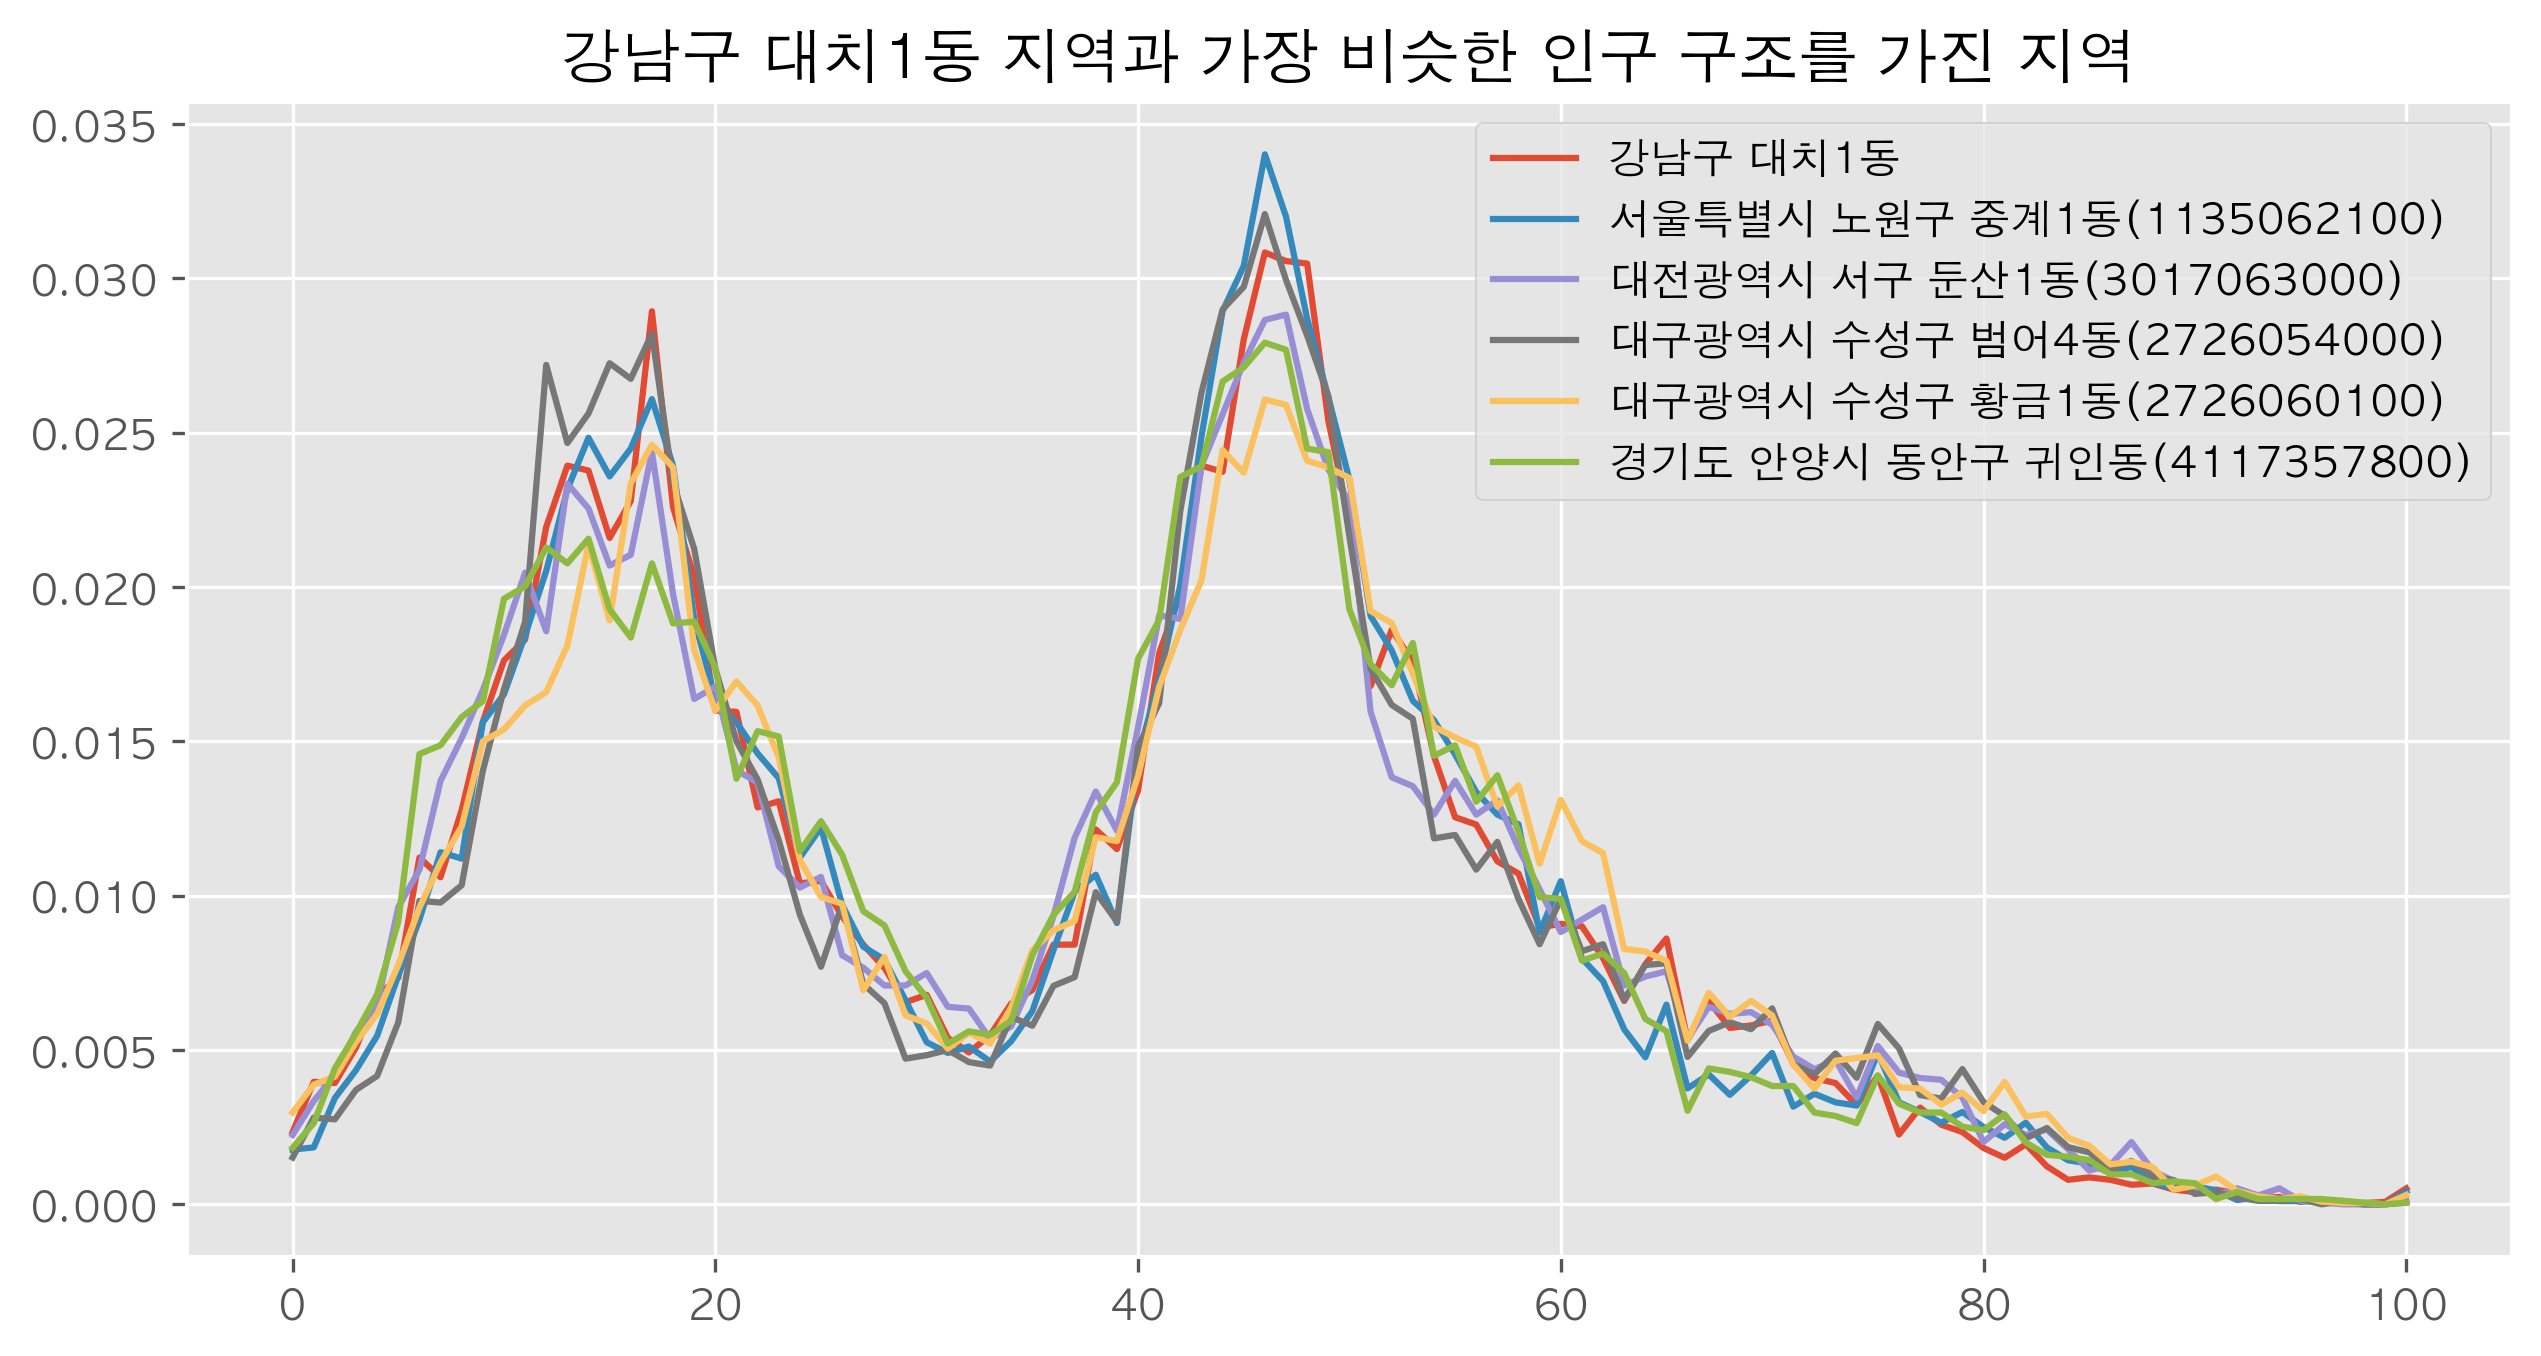

In [21]:
import numpy as np
import pandas as pd

age_path = '/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week05/age.csv'

# 1. 데이터 읽기
df = pd.read_csv(age_path, encoding='cp949')

# 2. 궁금한 지역의 이름 입력
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

# 3. 궁금한 지역의 인구 구조 저장
home = (df.loc[df['행정구역'].str.contains(name)]) 
home_index = (df.loc[df['행정구역'].str.contains(name)]).index.values[0]   # 인덱스
home_all = home['총인구수'][home_index]                                    # 총인구수
home_list = (home.loc[:, '0세':'100세 이상']).div(home_all)                # 나이대별 인구 비율
home_serise = home_list.squeeze()                                        # dataframe와의 나눗셈을 위해 hom을 seris로 변환

#4. 위와 가장 비슷한 인구 구조를 가진 지역 찾기
# 전체 데이터에서 나이별 인구 비율 구하기
df.loc[:, '0세':'100세 이상'] = df.loc[:, '0세':'100세 이상'].div(df['총인구수'], axis = 0)
save_df = df.copy() # 결과 복사본
# (home - away)**2
df.loc[:, '0세':'100세 이상'] = df.loc[:, '0세':'100세 이상'].sub(home_serise, axis = 1) ** 2
# 열끼리 더하기
sum_list = df.loc[:, '0세':'100세 이상'].sum(axis=1)
# 복사본에 sum 컬럼 추가
save_df['sum_list'] = sum_list
# 정렬
save_df = save_df.sort_values('sum_list', ascending=True)
# 결과 0은 home이므로 1부터 5개씩 뽑음
result_list = save_df[1:6].values.tolist()

# 5. home과 가장 비슷한 곳의 인구 구조를 시각화
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)            
plt.rcParams['font.family'] = 'AppleGothic'
plt.title(name +' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home_list.values.tolist()[0], label = name)
plt.plot(result_list[0][3:-1], label = result_list[0][0:1][0])
plt.plot(result_list[1][3:-1], label = result_list[1][0:1][0])
plt.plot(result_list[2][3:-1], label = result_list[2][0:1][0])
plt.plot(result_list[3][3:-1], label = result_list[3][0:1][0])
plt.plot(result_list[4][3:-1], label = result_list[4][0:1][0])
plt.legend()
plt.show()